<a href="https://colab.research.google.com/github/Mu1029/Project3/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 - Object Masking

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

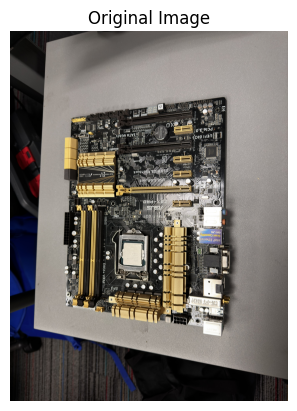

In [19]:
# read and display original image

pcb_image_bgr = cv2.imread('drive/MyDrive/Project 3 Data/motherboard_image.JPEG')

pcb_image = cv2.cvtColor(pcb_image_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(pcb_image)
plt.title('Original Image')
plt.axis('off')
plt.show()

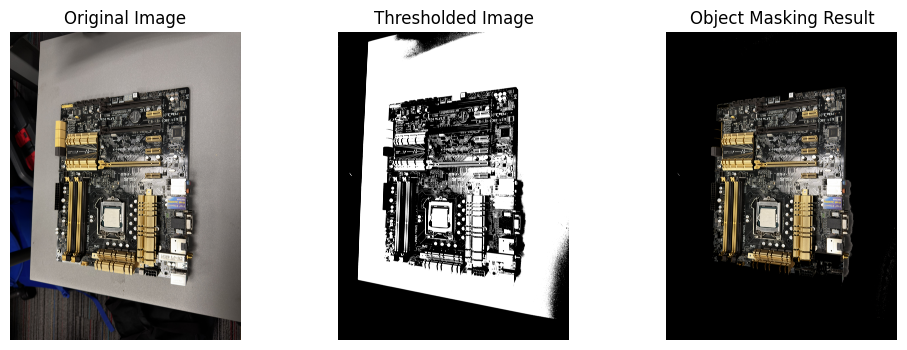

In [74]:
# OpenCV image processing

    # thresholding

pcb_image_gs = cv2.cvtColor(pcb_image, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(pcb_image_gs, 88, 255, cv2.THRESH_BINARY)

thresh_inv = cv2.bitwise_not(thresh)

  # finding + drawing contours

contours, _ = cv2.findContours(thresh_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # creating + applying mask

mask = np.zeros_like(pcb_image)

cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

result = cv2.bitwise_and(pcb_image, mask)

  # masking background
_, thresh = cv2.threshold(pcb_image_gs, 92, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

mask = np.zeros_like(pcb_image)

cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

masked_img = cv2.bitwise_and(result, mask)

  # displaying all figures

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(pcb_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(masked_img)
plt.title('Object Masking Result')
plt.axis('off')

plt.show()
